Importing pandas ; Importing numpy ; Importing seaborn ; Importing matplotlib ; Importing monthly progress prediction by book value

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_progress=pd.read_csv('../../data/output/monthly-progress-by-book-value/mean/past-data.csv',sep=';')

Creating the mean columns of progress dataframe

In [40]:
years=df_progress['Year'].unique()
prediction_interval=range(2,6)

df_progress = df_progress.set_index(['Year', 'Month'])

for year in years:
    index_year,index_month=df_progress.index.get_level_values('Year'),df_progress.loc[year].index.get_level_values('Month')
    for interval in prediction_interval:
        if year-interval<min(years):
            series_mean=np.nan
        else :
            series_mean=df_progress[(index_year<year)&(index_year>=year-interval)].groupby('Month')['Progress'].mean()
            for month in index_month:
                df_progress.loc[(year,month),str(interval)+' Mean']=series_mean[month]

print(df_progress[df_progress.index.get_level_values('Year')==2017])

            Progress    2 Mean    3 Mean    4 Mean    5 Mean
Year Month                                                  
2017 1      0.819292  0.815852  0.818944  0.820148  0.821210
     2      0.826559  0.845961  0.851996  0.868132  0.851293
     3      0.852290  0.867682  0.874321  0.896171  0.877437
     4      0.921661  0.866694  0.887246  0.908608  0.889873
     5      0.944658  0.840485  0.874759  0.899192  0.876533
     6      0.956255  0.827178  0.862275  0.861043  0.837074
     7      0.986477  0.857682  0.892669  0.891859  0.869536
     8      1.007685  0.872360  0.911455  0.902453  0.883270
     9      1.026129  0.851122  0.914731  0.905548  0.887219
     10     1.095342  0.897822  0.958721  0.954120  0.928483
     11     1.120332  0.873329  0.949177  0.937388  0.929103
     12     1.131297  0.873039  0.952185  0.927534  0.929164


Finding correlation between progress and mean prediction

In [41]:
for _,col in enumerate(df_progress.columns[2:]):
    print('Correlation between Progress and',col)
    print(df_progress['Progress'].corr(df_progress[col]),'\n')

Correlation between Progress and 3 Mean
0.15886503273924188 

Correlation between Progress and 4 Mean
0.2058783265908003 

Correlation between Progress and 5 Mean
0.31382355441831983 



Creating error mean dataframe ; Calculating the error mean

In [42]:
df_error_mean=pd.DataFrame(index=df_progress.index)

for interval in prediction_interval:
    df_error_mean[str(interval)+' Error']=(df_progress[str(interval)+' Mean']-df_progress['Progress'])


Visualizing error dataframe outliers

<Axes: >

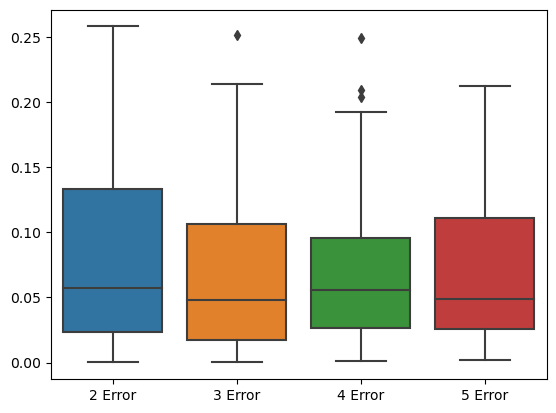

In [43]:
# the df_error_mean is not absolute due to the importance of error direction
sns.boxplot(data=df_error_mean.abs())

Cleaning the error dataframe

There is a total of 4  outliers of  420  data


<Axes: >

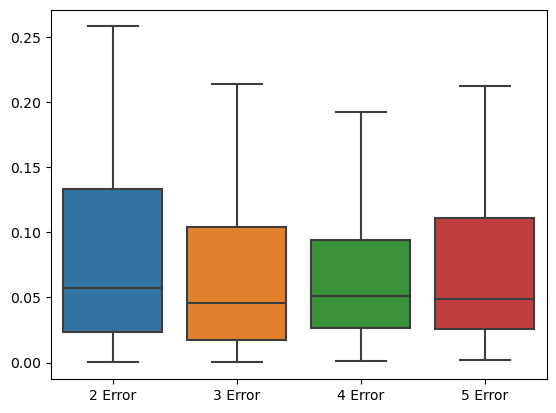

In [44]:
count_before=df_error_mean.count()

for i,col in enumerate(df_error_mean.columns):
    Q1 = df_error_mean[col].abs().quantile(0.25)
    Q3 = df_error_mean[col].abs().quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask=(df_error_mean[col].abs()<lower_bound)|(df_error_mean[col].abs()>upper_bound)
    df_error_mean[col]=df_error_mean[col].mask(outlier_mask)
    
count_after=df_error_mean.count()

print('There is a total of',count_before.sum()-count_after.sum(),' outliers of ',count_before.sum(),' data')

sns.boxplot(data=df_error_mean.abs())

Calculating the error mean after cleaning

In [45]:
df_error_mean=df_error_mean.dropna()
print(df_error_mean.abs().mean())
print(df_error_mean[df_error_mean.index.get_level_values('Year')==201])

2 Error    0.073284
3 Error    0.064645
4 Error    0.067519
5 Error    0.062234
dtype: float64
Empty DataFrame
Columns: [2 Error, 3 Error, 4 Error, 5 Error]
Index: []


Calculating monthly error auto correlation

In [46]:
lags=range(1,10)

for lag in lags:
    auto_corr=0;
    for _,col in enumerate(df_error_mean.columns):
        auto_corr+=df_error_mean[col].autocorr(lag)
    print('Auto-correlation at lag',lag)
    print(auto_corr/len(df_error_mean.columns),'\n')


Auto-correlation at lag 1
0.7674533092379539 

Auto-correlation at lag 2
0.5843331715686828 

Auto-correlation at lag 3
0.41596683623748165 

Auto-correlation at lag 4
0.2967226573358308 

Auto-correlation at lag 5
0.22661556829011437 

Auto-correlation at lag 6
0.10810594893764813 

Auto-correlation at lag 7
0.10046756045139657 

Auto-correlation at lag 8
0.09231612306951174 

Auto-correlation at lag 9
0.06591209105404452 



Exporting the progress dataframe to csv ; Exporting the error mean dataframe to csv

In [47]:
df_progress=df_progress.dropna()

df_progress.to_csv('../../data/output/monthly-progress-by-book-value/mean/past-prediction.csv',sep=';')
df_error_mean.to_csv('../../data/output/monthly-progress-by-book-value/error/past-prediction.csv',sep=';')